In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [170]:
!pip install numpy==1.16.5

In [171]:
data=pd.read_csv(r'C:\Users\thama\Downloads\car_age_price.csv')

In [172]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [173]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
Year     112 non-null int64
Price    112 non-null int64
dtypes: int64(2)
memory usage: 1.8 KB


# correlation

In [175]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


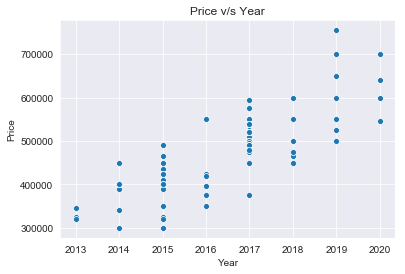

In [176]:
sns.scatterplot(x = "Year", y = "Price",data = data)
plt.title("Price v/s Year")
plt.show();

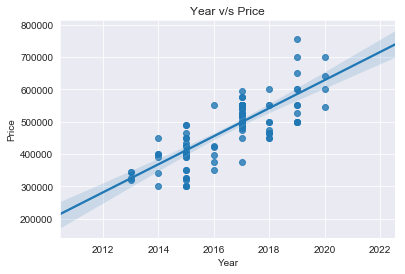

In [177]:
sns.regplot(x = "Year", y = "Price", data = data)
plt.title("Year v/s Price")
plt.show()

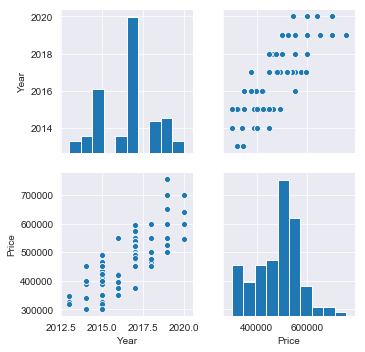

In [178]:
sns.set_style('darkgrid')
sns.pairplot(data)

# linear regression analysis

In [179]:
X=data['Year']
y=data['Price']
from sklearn.preprocessing import StandardScaler

In [180]:
X=data['Year'].values.reshape(-1,1)
y=data['Price'].values.reshape(-1,1)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2,
                                                   random_state=70)
print('X_train',X_train)
print('t_train is',y_train)

X_train [[2019]
 [2018]
 [2018]
 [2015]
 [2019]
 [2017]
 [2017]
 [2015]
 [2019]
 [2020]
 [2017]
 [2018]
 [2013]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]
 [2016]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]
 [2017]
 [2017]
 [2017]
 [2017]
 [2017]
 [2019]
 [2017]
 [2018]
 [2017]
 [2018]
 [2020]
 [2017]
 [2016]
 [2014]
 [2015]
 [2016]
 [2014]
 [2018]
 [2017]
 [2017]
 [2017]
 [2015]
 [2017]
 [2018]
 [2016]
 [2017]
 [2017]
 [2016]
 [2019]
 [2015]
 [2017]
 [2017]
 [2015]
 [2017]
 [2018]
 [2017]
 [2019]
 [2017]
 [2014]
 [2018]
 [2019]
 [2014]
 [2017]
 [2015]
 [2019]
 [2015]
 [2017]
 [2019]
 [2017]
 [2020]
 [2014]
 [2017]
 [2017]
 [2015]
 [2015]
 [2015]
 [2013]
 [2018]
 [2016]
 [2015]
 [2017]
 [2017]
 [2015]]
t_train is [[500000]
 [600000]
 [550000]
 [350000]
 [650000]
 [550000]
 [490000]
 [400000]
 [500000]
 [700000]
 [550000]
 [465000]
 [320000]
 [540000]
 [575000]
 [550000]
 [480000]
 [486000]
 [300000]
 [396000]
 [550000]
 [520000]
 [575000]
 [550000]
 [520000]
 [434999]
 [525000

In [182]:
from sklearn.metrics import mean_squared_error
sim_reg = LinearRegression()
sim_reg.fit(X_train,y_train)
y_pred = sim_reg.predict(X_test)
r_sqr = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print("The R-squred value with price is {} ".format(r_sqr))
print("MSE with is {}".format(mse))


The R-squred value with price is 0.643788301000352 
MSE with is 2881779579.629194


In [183]:
##since the value of r square is high it is best fit

# lasso  regerssion model

In [184]:
from sklearn.linear_model import Lasso


In [187]:
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_train)
print('the r square value is',r_sqr)
print('MSE = ',mse)

the r square value is 0.643788301000352
MSE =  2881779579.629194


# price of 2022 model

In [192]:
pred=sim_reg.predict([[2022]])
print('the price of 2022 model is',pred)

the price of 2022 model is [[723535.26627535]]
